In [1]:
!nvidia-smi

Sun Dec 28 06:51:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
print(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

cuda


In [3]:
!pip install -r https://huggingface.co/spaces/dylanebert/multi-view-diffusion/raw/main/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of accelerate to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of accelerate to determine which version is compatible with other requirements. This could take a while.
INFO: This is tak

In [8]:
!pip -q install -U "diffusers" "transformers" "accelerate" "safetensors" "huggingface_hub" "kiui" "xformers"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 7.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 709.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 102.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 12.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
import torch
from diffusers import DiffusionPipeline

multi_view_diffusion_pipeline = DiffusionPipeline.from_pretrained(
    "dylanebert/multi-view-diffusion",
    custom_pipeline="dylanebert/multi-view-diffusion",
    torch_dtype=torch.float16,
    trust_remote_code=True, # 보안 패제를 설정하는 기능으로 커스텀 파이썬 코드를 다운로드하여 모델을 구성 및 실행하는데 사용 즉, 모델 제공자의 코드가 내 컴퓨터엣 그대로 실행된다는 것을 의미함.
).to("cuda")


Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

image_encoder/model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

mv_unet.py: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by MVDreamPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
Expected types for unet: (<class 'diffusers_modules.local.dylanebert--multi-view-diffusion.3916e5568b2ee54ea8a81ce4961609158b2c464d.pipeline.MultiViewUNetModel'>,), got <class 'diffusers_modules.local.mv_unet.MultiViewUNetModel'>.


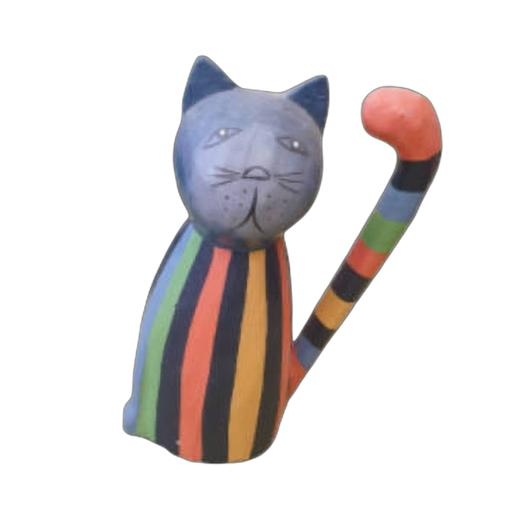

In [10]:
import requests
from PIL import Image
from io import BytesIO


image_url = "https://huggingface.co/datasets/dylanebert/3d-arena/resolve/main/inputs/images/a_cat_statue.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image

  0%|          | 0/30 [00:00<?, ?it/s]

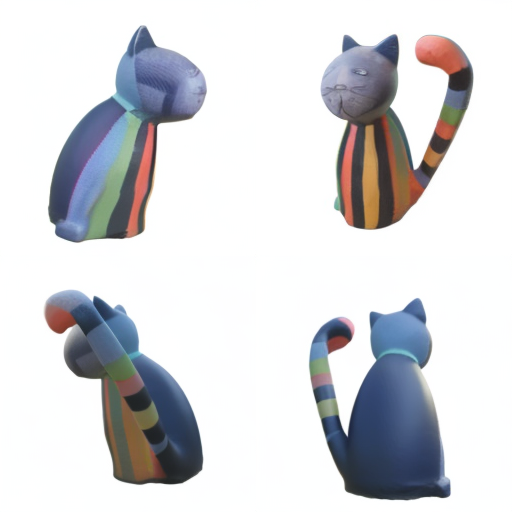

In [11]:
import numpy as np

def create_image_grid(images):
    images = [Image.fromarray((img * 255).astype("uint8")) for img in images]  #  이미지 데이터(img)를 처리하여 PIL (Python Imaging Library) 이미지 객체로 변환

    width, height = images[0].size  # .size의 경우, width와 heght를 동시에 튜플 형태로 반환함.
    grid_img = Image.new("RGB", (2 * width, 2 * height)) # 4개의 이미지를 2x2 grid에 배치해야 하므로, 단일 이미지의 너비와 높이의 2배 크기로 설정


    # 각 그리드에서의 원점으로 정렬해서 보여줌
    grid_img.paste(images[0], (0, 0))
    grid_img.paste(images[1], (width, 0))
    grid_img.paste(images[2], (0, height))
    grid_img.paste(images[3], (width, height))

    return grid_img

image = np.array(image, dtype=np.float32) / 255.0

# 확산 모델(diffusion model)을 호출하여 여러 각도의 이미지를 생성
# "" 텍스트 프롬프트는 비워두어, 텍스트가 아닌 이미지를 기반으로 새로운 이미지를 생성
# guidance_scale: 생성 과정에서 주어진 조건을 얼마나 강하게 따를지 결정하는 값
# num_inference_steps: 이미지를 생성하기 위해 모델이 거치는 단계(step)의 수입니다.
# elevation: 다각도(multi-view) 이미지 생성 시 카메라의 고도(elevation)를 0도로 설정합니다. 즉, 정면에서 바라본 각도의 이미지를 생성합니다.
images = multi_view_diffusion_pipeline("", image, guidance_scale=5, num_inference_steps=30, elevation=0) 

create_image_grid(images)

In [12]:
import gradio as gr

def run(image):
  image = np.array(image, dtype=np.float32) / 255.0
  images = multi_view_diffusion_pipeline("", image, guidance_scale=5, num_inference_steps=30, elevation=0)

  images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

  width, height = images[0].size
  grid_img = Image.new("RGB", (2 * width, 2 * height))

  grid_img.paste(images[0], (0, 0))
  grid_img.paste(images[1], (width, 0))
  grid_img.paste(images[2], (0, height))
  grid_img.paste(images[3], (width, height))

  return grid_img

demo = gr.Interface(fn=run, inputs="image", outputs="image")
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://555c4cf1af44ff5863.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/30 [00:00<?, ?it/s]